# IML MAJOR HW2 - Model Selection
| Name | ID |
|------|----|
| Daniel Gershkovich   | 209088723  |
| Assaf Alon   | 207376807  |

In [7]:
from matplotlib import pylab 
params = {'xtick.labelsize': 18, 
'ytick.labelsize': 18, 
'axes.titlesize' : 22, 
'axes.labelsize' : 20, 
'legend.fontsize': 18, 
'legend.title_fontsize': 22, 
'figure.titlesize': 24 } 
pylab.rcParams.update(params) 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint

from visualize_clf import visualize_clf

## Task 1 / Q1

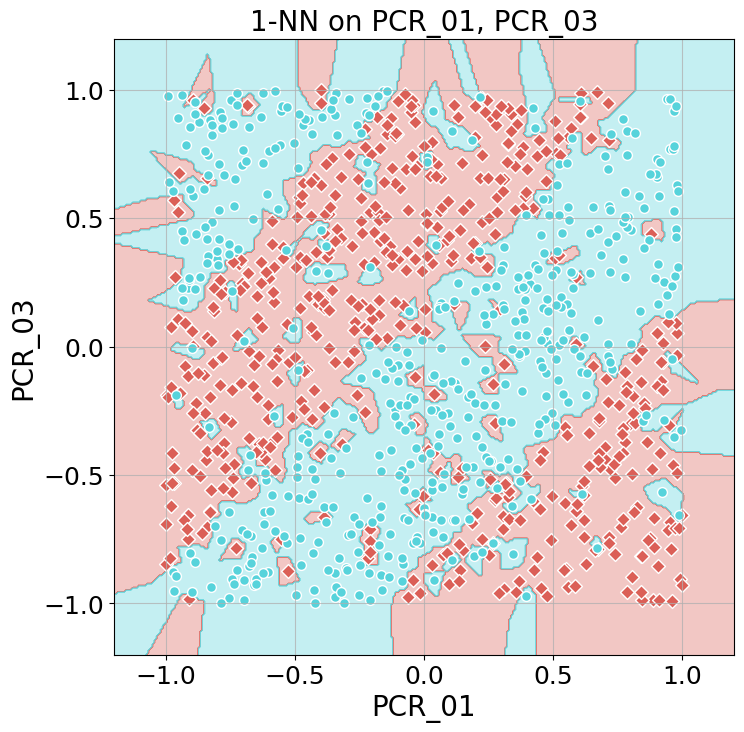

In [9]:
train_data_frame = pd.read_csv('prepared_train_data.csv')
train_data_frame = train_data_frame[['PCR_01', 'PCR_03', 'spread']]
knn = KNeighborsClassifier(n_neighbors=1)
data_frame_data = train_data_frame[['PCR_01', 'PCR_03']]
data_frame_labels = train_data_frame['spread']
knn.fit(data_frame_data.values, data_frame_labels)
visualize_clf(knn, data_frame_data.values, data_frame_labels.values, '1-NN on PCR_01, PCR_03', xlabel='PCR_01', ylabel='PCR_03')

### Q2

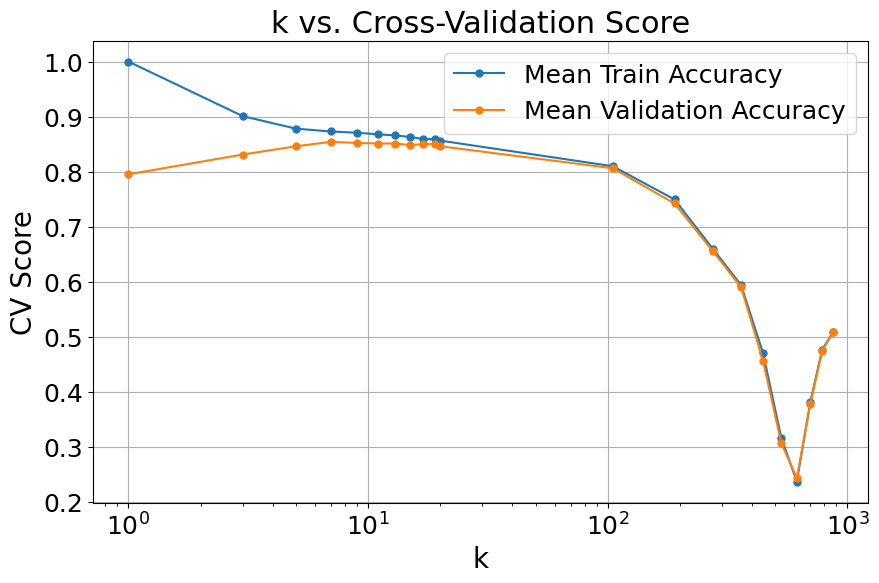

In [10]:
from sklearn.model_selection import cross_validate

k_range = list(range(1, 20, 2)) + list(range(20, 871, 85))
test_cv_scores = []
train_cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, data_frame_data.values, data_frame_labels, cv=8, n_jobs=8, return_train_score=True)
    test_cv_scores.append(np.mean(scores['test_score']))
    train_cv_scores.append(np.mean(scores['train_score']))

# pprint(cv_scores)

plt.figure(figsize=(10, 6))
plt.semilogx(k_range, train_cv_scores, marker=".", markersize=10, label='Mean Train Accuracy')
plt.semilogx(k_range, test_cv_scores, marker=".", markersize=10, label='Mean Validation Accuracy')
plt.xlabel('k')
plt.ylabel('CV Score')
plt.title('k vs. Cross-Validation Score')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
best_k_index = np.argmax(test_cv_scores)
best_k = k_range[best_k_index]
print(f'Best k: {best_k}')
print(f'Train score for  k={best_k}: {train_cv_scores[best_k_index]}')
print(f'Test score for  k={best_k}: {test_cv_scores[best_k_index]}')

Best k: 7
Train score for  k=7: 0.8728571428571429
Test score for  k=7: 0.854


### Q3

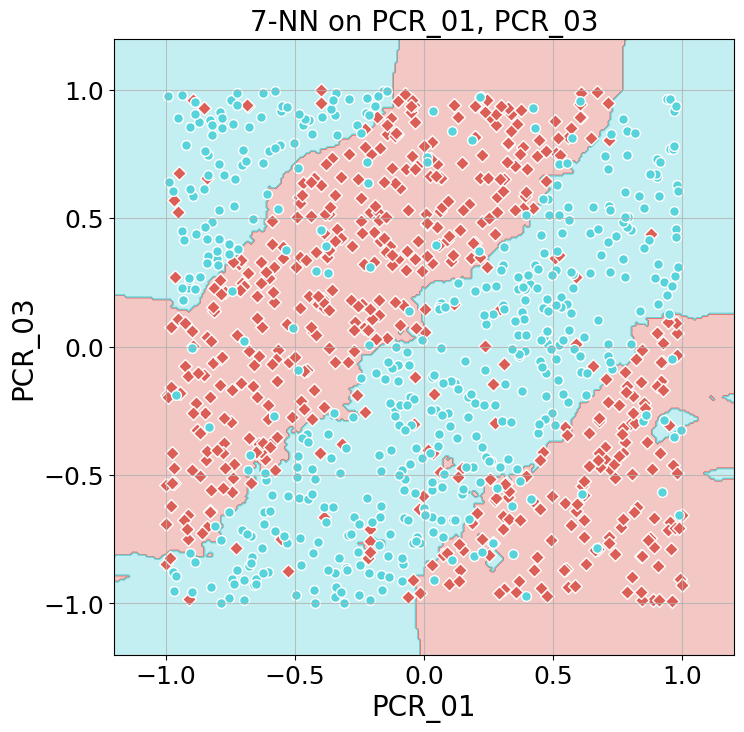

0.872


In [12]:
test_data_frame = pd.read_csv('prepared_train_data.csv')
test_data_data = test_data_frame[['PCR_01', 'PCR_03']].values
test_data_labels = test_data_frame['spread']


knn = KNeighborsClassifier(n_neighbors=7)
data_frame_data = train_data_frame[['PCR_01', 'PCR_03']]
data_frame_labels = train_data_frame['spread']
knn.fit(data_frame_data.values, data_frame_labels)
visualize_clf(knn, data_frame_data.values, data_frame_labels.values, '7-NN on PCR_01, PCR_03', xlabel='PCR_01', ylabel='PCR_03')
score = knn.score(test_data_data, test_data_labels)
print(score)

## Part 2: Decision Trees

0.616


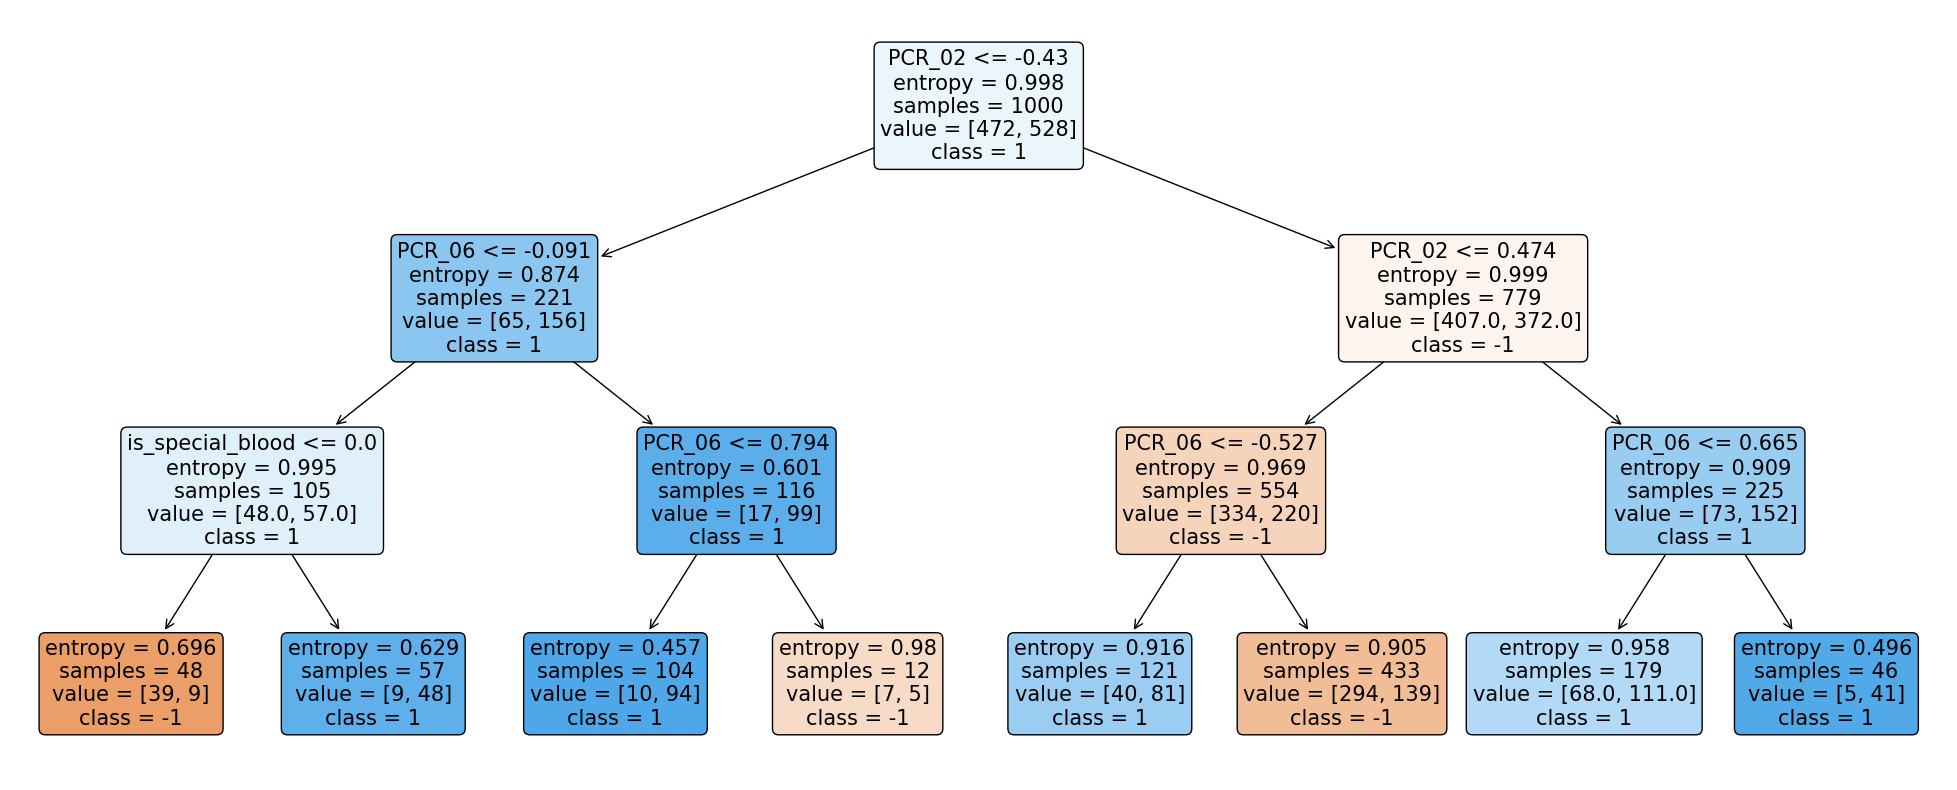

In [13]:
from sklearn.tree import plot_tree

id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
train_data_frame = pd.read_csv('prepared_train_data.csv')
test_data_frame = pd.read_csv('prepared_test_data.csv')
test_data_data = test_data_frame.drop(['spread', 'risk'], axis=1)
test_data_labels = test_data_frame['risk']
train_data_data = train_data_frame.drop(['spread', 'risk'], axis=1)
train_data_labels = train_data_frame['risk']
id3.fit(train_data_data.values, train_data_labels)
score = id3.score(test_data_data.values, test_data_labels)

plt.figure(figsize=(25, 10))
plot_tree(id3, filled=True, feature_names=train_data_data.columns, class_names=['-1', '1'], fontsize=15, rounded=True)

print(score)
data_frame_data = train_data_frame[['PCR_01', 'PCR_03']]
data_frame_labels = train_data_frame['spread']
# 

## Model Selection

### Q6

In [14]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'min_samples_leaf': list(range(1, 41, 2)),
    'max_depth': list(range(1, 15))
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(train_data_data.values, train_data_labels)

results = pd.DataFrame(grid.cv_results_)

# TODO:
# annot=True
# ticks
# Important: The plots should be readable and informative! 
# Training acc / Validation acc

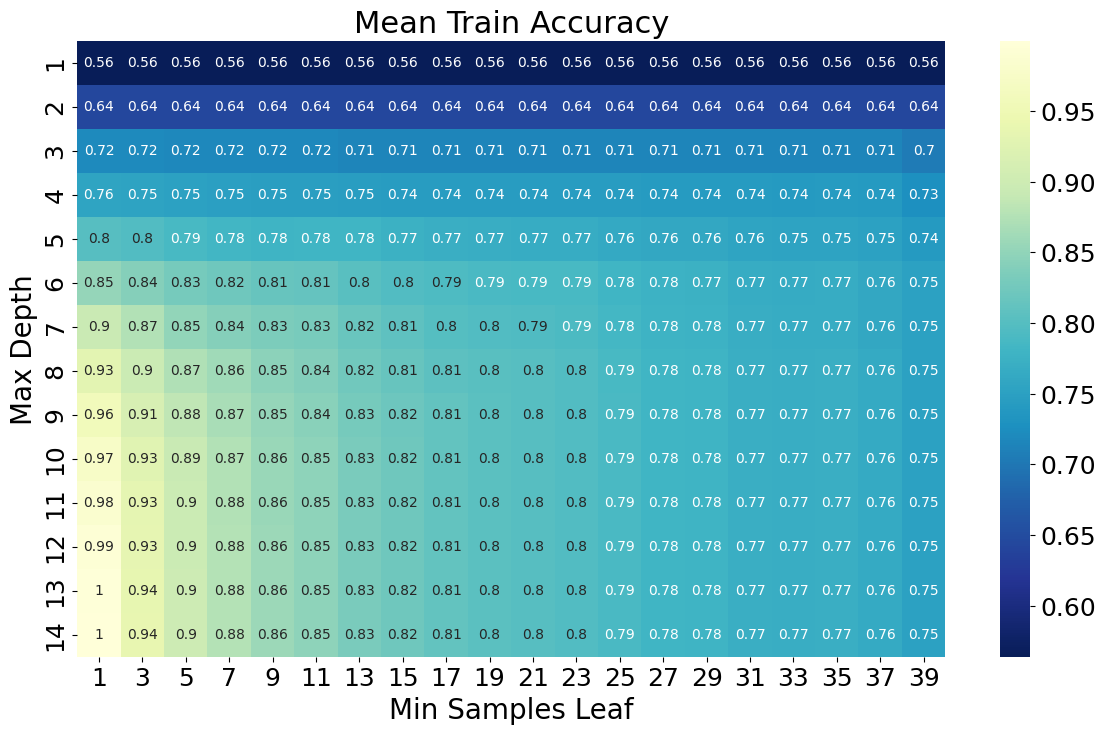

In [15]:
# mean train score
scores = results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_train_score')

plt.figure(figsize=(14, 8))
sns.heatmap(scores, annot=True, cmap='YlGnBu_r')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Max Depth')
plt.title('Mean Train Accuracy')
plt.show()

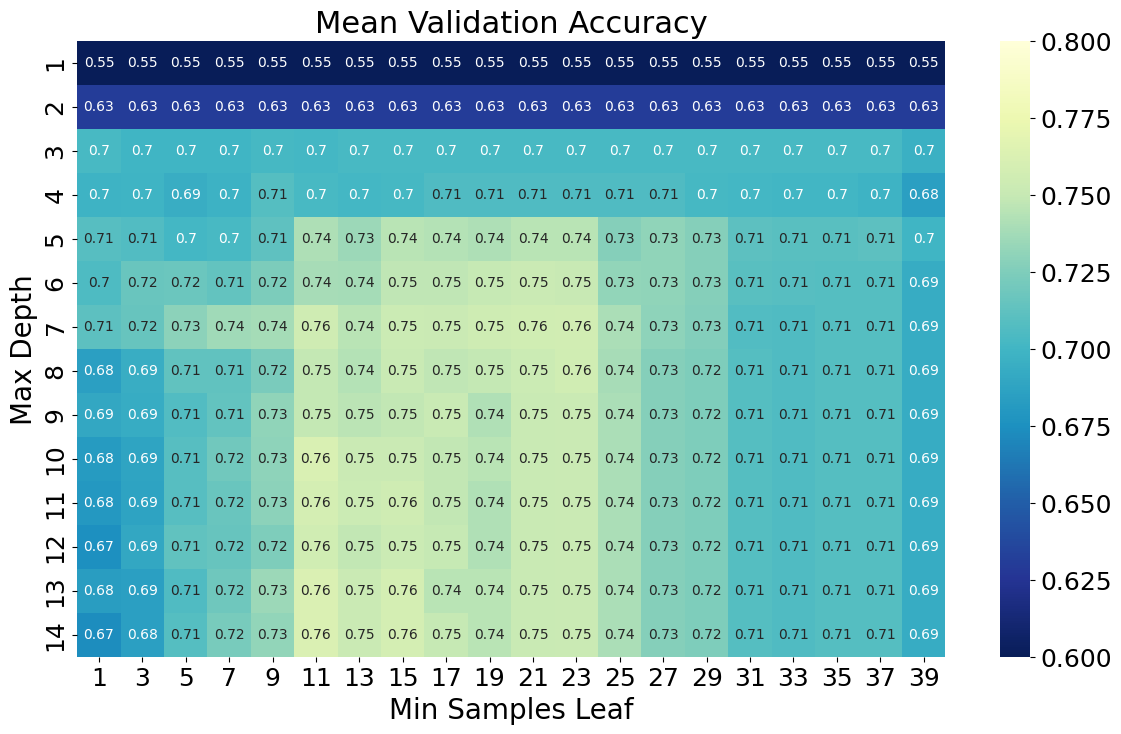

In [16]:
# mean validation score
scores = results.pivot(index='param_max_depth', columns='param_min_samples_leaf', values='mean_test_score')

plt.figure(figsize=(14, 8))
sns.heatmap(scores, annot=True, cmap='YlGnBu_r', vmin=0.6, vmax=0.8)
plt.xlabel('Min Samples Leaf')
plt.ylabel('Max Depth')
plt.title('Mean Validation Accuracy')
plt.show()

In [17]:
max_depth = 7
min_samples_per_leaf = 15
id3 = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=min_samples_per_leaf)
id3.fit(train_data_data.values, train_data_labels)

score = id3.score(test_data_data.values, test_data_labels)
print(score)

0.736


## Part 3: Linear SVM and Polynomial Kernel

In [18]:
train_data_frame = pd.read_csv('prepared_train_data.csv')
data_frame_data = train_data_frame[['PCR_01', 'PCR_03']]
data_frame_labels = train_data_frame['spread']
test_data_frame = pd.read_csv('prepared_test_data.csv')
test_data_data = test_data_frame[['PCR_01', 'PCR_03', 'spread']]
test_data_labels = test_data_frame['spread']

In [60]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        norm = np.linalg.norm(w)
        loss = norm + C * np.sum(np.maximum(0, 1 - hinge_inputs))

        return loss


    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        
        threshold = np.vectorize(lambda x:-1 if x < 1 else 0)

        margins = (X.dot(w) + b).reshape(-1, 1)
        unhinged = np.multiply(margins, y.reshape(-1, 1))
        g_w = 2 * w + C * np.sum(np.multiply(np.multiply(threshold(unhinged), y.reshape(-1, 1)), X), axis=0)
        g_b = C * np.sum(np.multiply(threshold(unhinged), y.reshape(-1, 1)))
        
        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]
        
        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            self.w -= self.lr * g_w
            self.b -= self.lr * g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = np.sign(X.dot(self.w) + self.b)
        y_pred[y_pred == 0] = 1  # if the result is ON THE MARGIN, we consider it as positive

        return y_pred


In [56]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r'$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    # plt.grid(alpha=0.5)
    plt.grid(which='both', linestyle='-', linewidth='0.5', color='gray')

    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    plt.show()



## Q9

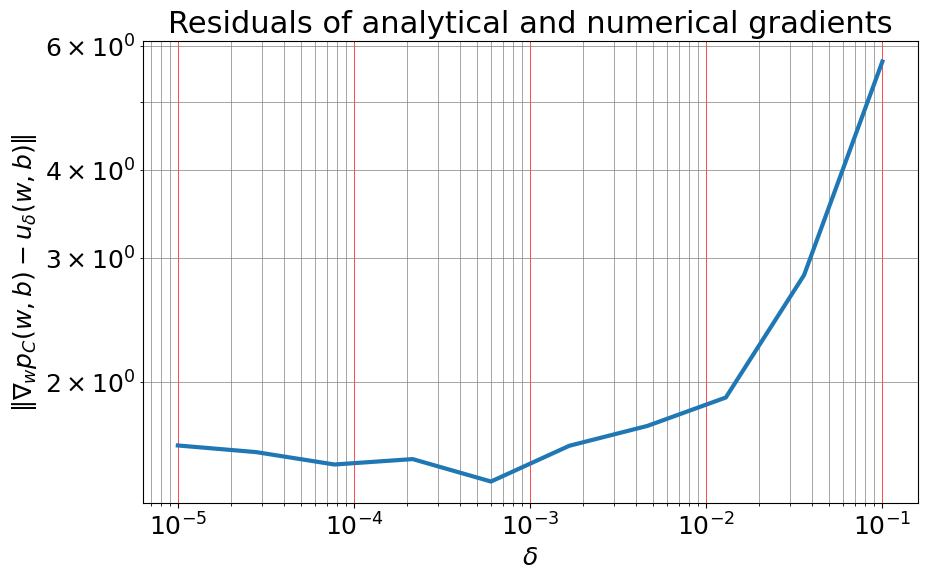

In [59]:
# compare_gradients()
# plt.grid(True)
compare_gradients(data_frame_data.values, data_frame_labels.values, deltas=np.logspace(-5, -1, 10))


## Q11

In [ ]:
C=1e5 
X_train = data_frame_data.values
y_train = data_frame_labels.values
for lr in np.logspace(-9, -5, 5):
    clf = SoftSVM(C=C, lr=lr) 
    losses, accuracies = clf.fit_with_logs(X_train, y_train, max_iter=5000) 
    plt.figure(figsize=(13, 6)) 
    plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Training Loss") 
    plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss") 
    plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Training Accuracy") 
    plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy") 
    plt.suptitle(f"Learning rate: {lr}")
    plt.tight_layout() 
    plt.show()
    

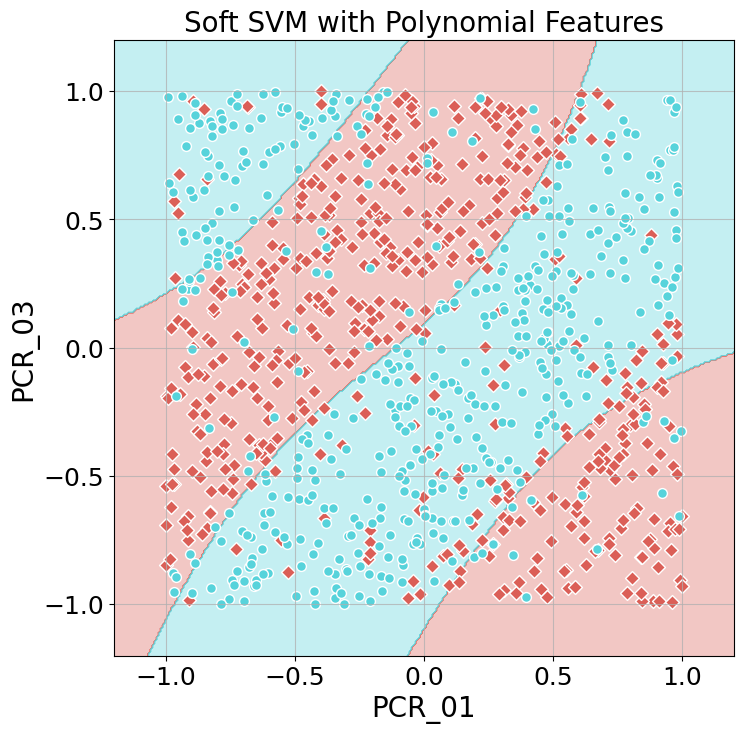

Train score: 0.813
Test score: 0.824


In [106]:

test_data_frame = pd.read_csv('prepared_test_data.csv')
X_test = test_data_frame[['PCR_01', 'PCR_03']].values
y_test = test_data_frame['spread']
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
p_features = PolynomialFeatures(degree=3, include_bias=False)
svm_clf = Pipeline([('feature_mapping', p_features),  ('scaler', MinMaxScaler()), ('SVM', SoftSVM(C=1e11, lr=1e-8))]) 
svm_clf.fit(X_train, y_train, SVM__max_iter=5000) 

# graph the trained model's decision boundary
visualize_clf(svm_clf, X_train, y_train, 'Soft SVM with Polynomial Features', xlabel='PCR_01', ylabel='PCR_03')
print(f"Train score: {svm_clf.score(X_train, y_train)}")
print(f"Test score: {svm_clf.score(X_test, y_test)}")
